In [1]:
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
def extract_val(d, key):
    val_start = d.find(key)
    val_end = val_start + d[val_start:].find(",")
    val = d[val_start:val_end].split("=")[1]
    return val.replace("'", "")

def load_logs(logfile):
    with open(logfile, "r") as f:
        data = f.readlines()
    
    retdata = defaultdict(list)
    alg = None
    
    for d in data:
        if "data_kind" in d:
            data_kind = extract_val(d, "data_kind")
            inp_to_eval = extract_val(d, "inp_to_eval")
            if data_kind == "":
                data_kind = "true"
            
        if "-->" in d:
            linedata = d.split(" ")
            ehash = linedata[5]
            rt = float(linedata[-1].replace("\n", ""))
            rep = int(linedata[-3])
            retdata["ehash"].append(ehash)
            retdata["rt"].append(rt)
            retdata["rep"].append(rep)
            retdata["data_kind"].append(str(data_kind))
            retdata["inp_to_eval"].append(inp_to_eval)
    
    df = pd.DataFrame(retdata)
    return df

In [29]:
LOGDIR = "../results/"

In [30]:
fns = glob.glob(LOGDIR + "*.log")
dfs = []

for fn in fns:
    df = load_logs(fn)
    dfs.append(df)

In [31]:
df = pd.concat(dfs)

In [32]:
print(set(df["data_kind"]), set(df["inp_to_eval"]))
df

{'true', 'random_domain3'} {'mi'}


,ehash,rt,rep,data_kind,inp_to_eval
0,1445181067565615963714989244604800786123047056644,1.265104,0,random_domain3,mi
1,915029170915645337045155848430817461122198949223,1.070670,0,random_domain3,mi
2,648840168530145489155498068332217171541974777094,0.729891,0,random_domain3,mi
3,939906722582594503280211484844109823221417696432,0.973084,0,random_domain3,mi
4,985595977828115300791443894398287667156903744520,1.405272,0,random_domain3,mi
...,...,...,...,...,...
295,1406086290633135910613729171818489439155527733675,1.114464,2,true,mi
296,230535799474811724369185576624635874796407929836,1.425484,2,true,mi
297,1173753053974897997170216843784886333724472464199,0.577801,2,true,mi
298,777796671173874060892052610456388716951917013795,0.843946,2,true,mi


In [33]:
df = df[df.data_kind != 'random_domain']
#df = df[df.inp_to_eval == 'n']

In [34]:
df.groupby(["data_kind"])["rt"].sum()

data_kind
random_domain3    338.095377
true              256.369481
Name: rt, dtype: float64

In [35]:
df.groupby(["data_kind"])["rt"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
random_domain3,300.0,1.126985,0.263615,0.722544,1.129181,1.471196,1.658474,1.837846
true,300.0,0.854565,0.281910,0.434561,0.842386,1.220949,1.438211,1.633520


In [36]:
tmp = df.groupby(["ehash", "data_kind"])[["rt"]].mean().reset_index()

In [37]:
edf = tmp.set_index(['ehash', 'data_kind'])['rt'].unstack().reset_index()

In [38]:
#sns.scatterplot(data=edf, x = "test_shuffle", y="true_cols", alpha=0.2)

<AxesSubplot:xlabel='random_domain3', ylabel='true'>

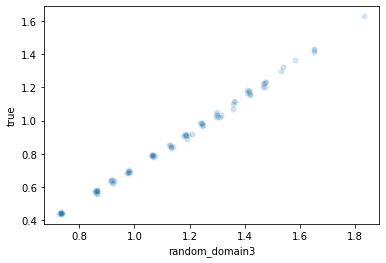

In [40]:
sns.scatterplot(data=edf, x = "random_domain3", y="true", alpha=0.2)